**Please help by upvoting this kernel if you feel useful and share your suggestions for any improvement. It will be very motivating for me.**

**PROBLEM STATEMENT:-**

* We are provided with a few features of a Diamond and based on that we are expected to estimate its price.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Extract the Diamond dataset,Explore and Analyse it.

![](http://)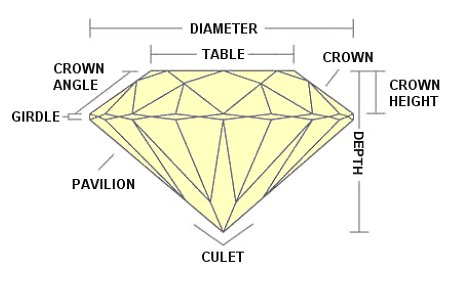

In [ ]:
df= pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
# print(df.columns)
print(df.shape)
df.head()

### Features
* Carat : Carat weight of the Diamond.

* Cut : Describe cut quality of the diamond.
    Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
    
* Color : Color of the Diamond. from J (worst) to D (best)

* Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes. In order from worst to best :-  I1,SI2, SI1, VS2, VS1, VVS2, VVS1, IF

* Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.

* Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.

* X : Length of the Diamond in mm.

* Y : Width of the Diamond in mm.

* Z : Height of the Diamond in mm.

* Price : the Price of the Diamond.

* Qualitative Features (Categorical) : Cut, Color, Clarity.
* Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

* The **Unnamed: 0** column, which is meant to be the 'Id' can be dropped bcz we already have indices.

In [ ]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

* So there is no null values in any column.

In [ ]:
df.describe()

* Check how the values of each feature are spread.. their min,max and count obviosly.
* Here, the min values of x,y and z are 0. It doesnt make any sense to have the diamond dimension to be zero. May be this data is there by mistake. Lets have a look at those logic less rows.

In [ ]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

* Such cases are dealt by repalcing those partiular cells by *mean,median or mode* Or they can be dropped also, depending on the data. Here dropping them seems a better option. (Check for imputer in scikit learn to know more) 

In [ ]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

### Dealing with Categorical columns

* Cut, Color and clarity are three categorical features. Lets see the unique values in them.

In [ ]:
for col in ['cut','color','clarity']:
    print('{} : {}'.format(col,df[col].unique()))
df.nunique()  #To check number of unique values in each feature

### Correlation between features

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

Correlation coefficient between price ~ carat, price ~ dimensions are high (0.9 above). That means features carat and dimensions of the diamond highly affect the target, i.e. diamond price.
Also the features x,y,z also show high coorelation coefficient among each other.So they can be combined into one feature.

### **Visualisation of all Features**

#### PRICE ~ CARAT

In [ ]:
plt.scatter(df.carat,df.price)

####  PRICE ~ CUT

In [ ]:
sns.catplot(x='cut', data=df , kind='count',aspect=2,order=['Fair','Good','Very Good','Premium','Ideal'] )

In [ ]:
sns.catplot(x='cut', y = 'price',data=df ,aspect=2,kind='box' ,order=['Fair','Good','Very Good','Premium','Ideal'])

#### PRICE ~ COLOR

In [ ]:
sns.catplot(x='color', data=df , kind='count',aspect=2 ,order=['J','I','H','G','F','E','D'])

In [ ]:
sns.catplot(x='color', y='price', data=df ,aspect=2.5,kind='box',order=['J','I','H','G','F','E','D'] )

### CLARITY ~ PRICE

In [ ]:
sns.catplot(x='clarity', data=df , kind='count',aspect=2 ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

In [ ]:
sns.catplot(x='clarity',y='price',data=df, kind='box',aspect=2,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

#### PRICE ~ DEPTH

In [ ]:
plt.hist(x='depth',data=df,bins=40)
plt.show

In [ ]:
sns.regplot(x='depth',y='price',data=df)

### x, y and z dimensions

In [ ]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

### FEATURE ENGINEERING

Because the diamond dimensions - x,y and z are correlated to each other (We have also seen it in the correlation matrix) , so we can replace these 3 features with one single feature -VOLUME. So lets add volume feature and drop the x,y and z features.

In [ ]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

In [ ]:
plt.hist( x=df['volume'] , bins=50 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.xlim(0,600)
plt.ylim(0,30000)
plt.show()

In [ ]:
sns.relplot(x='volume',y='price',data=df)

In [ ]:
df.drop(['x','y','z'], axis=1, inplace= True)

### **FEATURE ENODING**

Now we convert categorial columns to numerical values. This step can be done manually for small datasets,or by using scikit learn's LabelEncoder or OneHotEncoder, depending on values in that column.

In [ ]:
df.head(5)

In [ ]:
##Using map funciton of python
L_cut_map = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = [L_cut_map.get(item) for item in df['cut']]

L_color_map = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
df['color'] = [L_color_map.get(item) for item in df['color']]

L_clar_map = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = [L_clar_map.get(item) for item in df['clarity']]

In [ ]:
##Using LabelEncoder of scikit learn
# label_cut = LabelEncoder()
# label_color = LabelEncoder()
# label_clarity = LabelEncoder()


# df['cut'] = label_cut.fit_transform(df['cut'])
# df['color'] = label_color.fit_transform(df['color'])
# df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [ ]:
df.head()

* See now we have the different categories of each categorical column of the dataset converted to numerical values as seen in df.head()
* For example the categories of categorical column CUT are - Ideal, Premium, Very Good , Good and Fair. After Label Encoding these categories are converted to numbers like-0,1,2,3 and 4.

In [ ]:
df.shape

### TRAIN TEST SPLIT

**Separate the features and the target column**. Below X contains the features and Y is the price column (also called Label or Target)

In [ ]:
X = df.drop(['price'],axis=1)
Y = df['price']

* Use scikitlearn's train_test_split to create train and test files.
* The test size=0.2 represents that 20% of X and Y dataframes goes to the test files.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=40)

* Then train the **X_train** and **Y_train** dataframes by **LinearRegression** model.
* Predicting the values for X_test and finding the rmse 

In [ ]:
X_test.head()

## MODELLING


### By Linear Regression :

In [ ]:
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
prediction = Lreg.predict(X_test)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))

### By Random Forest Regression :

In [ ]:
RFreg_model = RandomForestRegressor()
RFreg_model.fit(X_train,y_train)
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

...........................
#### What Is R-squared?
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean.
...........................

In [ ]:
Result= pd.DataFrame({'Actual Price':y_test,'Predicted Price By LinReg':prediction,'Predicted Price By RandForest':prediction2})
Result

RANDOM FOREST REGRESSION PROVIDES  FAR BETTER RESULT.

### THANK YOU.

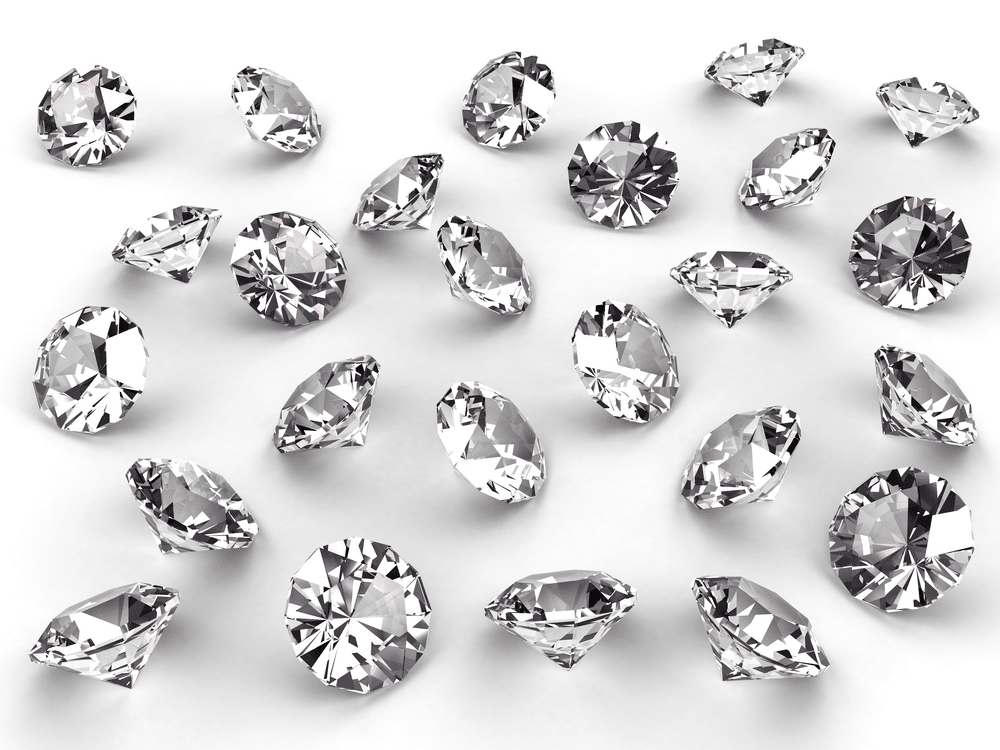